In [1]:
import os
import csv
import time
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils import clip_grad_norm_

from utils import print_model_information, make_simulations, generate_gaussian_peaks, solve_heat_equation_2d, solve_wave_equation_2d

from simulation_class import SimulationModel

from network_architectures import (
    WaveEquationSurrogateLinear,
    MultiLayerConvolutional,
    SurrogateEncodeDecode,
    SurrogateUNet
    )

print_model_information(MultiLayerConvolutional(convlayers=1))
print_model_information(MultiLayerConvolutional(convlayers=3))
print_model_information(MultiLayerConvolutional(convlayers=5))
print_model_information(MultiLayerConvolutional(convlayers=7))

print_model_information(WaveEquationSurrogateLinear())

print_model_information(SurrogateEncodeDecode())
print_model_information(SurrogateUNet())

# # Generate training data
equation_type = "heat"
equation_parameter = 3

Num pars: 1LayerConvolutional: --425-- and output size torch.Size([1, 1, 100, 100])
Num pars: 3LayerConvolutional: --6745-- and output size torch.Size([1, 1, 100, 100])
Num pars: 5LayerConvolutional: --13065-- and output size torch.Size([1, 1, 100, 100])
Num pars: 7LayerConvolutional: --19385-- and output size torch.Size([1, 1, 100, 100])
Num pars: WaveEquationSurrogateLinear: --170008-- and output size torch.Size([1, 100, 100])
Num pars: SurrogateEncodeDecode: --41957-- and output size torch.Size([1, 1, 100, 100])
Num pars: SurrogateUNet: --229947-- and output size torch.Size([1, 1, 100, 100])


In [2]:
inputs_train, output_train = make_simulations(number=200, k=1, nt=150, equation=equation_type, equation_parameter=equation_parameter, as_tensor=True)

torch.save({
    'inputs_train': inputs_train,
    'output_train': output_train
}, './data/train_test_data.pth')

permute = torch.randperm(inputs_train.size(0))
permute_reverse = torch.argsort(permute)

In [3]:
permute = torch.randperm(inputs_train.size(0))
permute_reverse = torch.argsort(permute)

In [8]:
inputs_train, output_train = torch.load('./data/train_test_data.pth').values()

### What would the error be is the neural net just learns nn(x)=x?
print(1e6*torch.mean((inputs_train - output_train)**2)) # approximately 1

C:\Users\gouwenss\AppData\Local\Temp\ipykernel_27964\1955956116.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  inputs_train, output_train = torch.load('./data/train_tes

tensor(1.0108)


Below we make almost the simplest convolutional neural network possible. 

One convolutional kernel with size 7. One kernel combining the channels

All kernel sizes are taken at 7. The model MultiLayerConvolutional starts with a convolutional layer expanding the number of channels from 1 to 8. The argument *convlayers* changes the total number of convolutional layers with a kernel larger than 1. This way we can see how the increasing complexity of the (fully convolutional) network helps to model the data.

The model is designed such that each layer outputs the same dimension as it has received as input.

In [ ]:
model_onelayerconvolutional = SimulationModel(inputs_train, output_train,
    model = MultiLayerConvolutional(convlayers=1),
    load_model_parameters=True, 
    equation=equation_type, 
    equation_parameter=equation_parameter)

model_onelayerconvolutional.train(num_epochs=500, print_every=25, save_model=True)
model_onelayerconvolutional.plot_errors(skip_first=5, save_training_plot=True)
model_onelayerconvolutional.animate_solution(save_animation = True)

c:\Users\gouwenss\AppData\Local\miniconda3\Library\envs\flow_matching\lib\site-packages\torch\cuda\__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Loading parameters of the previously fit model.


In [ ]:
model_threelayerconvolutional = SimulationModel(inputs_train, output_train,
    model = MultiLayerConvolutional(convlayers=3),
    load_model_parameters=True, 
    equation=equation_type, 
    equation_parameter=equation_parameter)

model_threelayerconvolutional.train(num_epochs=500, print_every=25, save_model=True)
model_threelayerconvolutional.plot_errors(skip_first=5, save_training_plot=True)
model_threelayerconvolutional.animate_solution(save_animation = True)

c:\Users\gouwenss\AppData\Local\miniconda3\Library\envs\flow_matching\lib\site-packages\torch\cuda\__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Loading parameters of the previously fit model.


MovieWriter ffmpeg unavailable; using Pillow instead.


Same model as above, but with three convolutional layers instead of 3. All intermediate layers have 8 channels.

In [ ]:
model_fivelayerconvolutional = SimulationModel(inputs_train, output_train,
    model = MultiLayerConvolutional(convlayers=5),
    load_model_parameters=True, 
    equation=equation_type, 
    equation_parameter=equation_parameter)

model_fivelayerconvolutional.train(num_epochs=1000, print_every=1, save_model=True)
model_fivelayerconvolutional.plot_errors(skip_first=5, save_training_plot=True)
model_fivelayerconvolutional.animate_solution(save_animation = True)

Loading parameters of the previously fit model.


KeyboardInterrupt: 

In [ ]:
model_sevenlayerconvolutional = SimulationModel(inputs_train, output_train,
    model = MultiLayerConvolutional(convlayers=7),
    load_model_parameters=True, 
    equation=equation_type, 
    equation_parameter=equation_parameter)

model_sevenlayerconvolutional.train(num_epochs=1000, print_every=25, save_model=True)
model_sevenlayerconvolutional.plot_errors(skip_first=5, save_training_plot=True)
model_sevenlayerconvolutional.animate_solution(save_animation = True)

In [ ]:
model_ninelayerconvolutional = SimulationModel(inputs_train, output_train,
    model = MultiLayerConvolutional(convlayers=9),
    load_model_parameters=False, 
    equation=equation_type, 
    equation_parameter=equation_parameter)

model_ninelayerconvolutional.train(num_epochs=1000, print_every=25, save_model=True)
model_ninelayerconvolutional.plot_errors(skip_first=5, save_training_plot=True)
model_ninelayerconvolutional.animate_solution(save_animation = True)

Perhaps it may be useful to compress the data into a smaller dimension, and deconvolute to the original. The next network uses 4 convolutional layers to compress the 1x100x100 image to 32x13x13 images followed by 4 deconvolutation layers to bring the dimensionality back to 1x100x100.

Maybe 32x13x13 is still a little much. Why not get it to 32x8x8?

Epoch [10/500] | Train Loss: 9388.6640 | Test Loss: 8419.0010 | Total time 0.70 min at 4.4 sec per epoch (error is *10e6)
Epoch [20/500] | Train Loss: 518.7019 | Test Loss: 421.0192 | Total time 1.50 min at 4.4 sec per epoch (error is *10e6)
Epoch [30/500] | Train Loss: 25.0379 | Test Loss: 22.7309 | Total time 2.10 min at 4.3 sec per epoch (error is *10e6)
Epoch [40/500] | Train Loss: 22.7457 | Test Loss: 22.4338 | Total time 2.80 min at 4.2 sec per epoch (error is *10e6)
Epoch [50/500] | Train Loss: 16.3246 | Test Loss: 18.3370 | Total time 3.50 min at 4.2 sec per epoch (error is *10e6)
Epoch [60/500] | Train Loss: 17.0293 | Test Loss: 13.0265 | Total time 4.10 min at 4.1 sec per epoch (error is *10e6)
Epoch [70/500] | Train Loss: 14.8179 | Test Loss: 17.8659 | Total time 4.70 min at 4.0 sec per epoch (error is *10e6)
Epoch [80/500] | Train Loss: 15.1801 | Test Loss: 17.5172 | Total time 5.20 min at 3.9 sec per epoch (error is *10e6)
Epoch [90/500] | Train Loss: 12.0039 | Test Loss: 

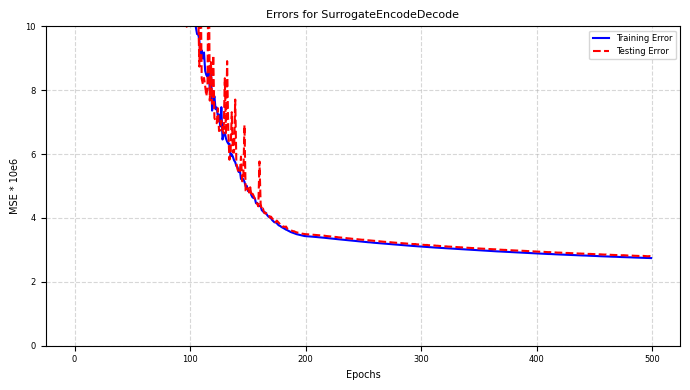

In [9]:
model_encodedecode = SimulationModel(inputs_train, output_train,
    model=SurrogateEncodeDecode(),
    load_model_parameters=False)

model_encodedecode.train(num_epochs=500, print_every=10, save_model=True)

model_encodedecode.plot_errors()

# model_surrogate1.animate_solution()

We can also draw inspiration from UNets, originally designed to color specific regions in images (locating and marking tumors, for example). This network works similarly to the EncodeDecode network, it first encodes the network en then decodes. The network is typically drawn like a U-shape. The higher in the sticks of the U, the less compressed.

In the middle of the U, there is a bottleneck, which has the highest level of encoding. Corresponding levels of the encoding and decoding part are related to eachother. 

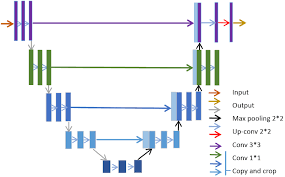

In [ ]:
import torch
import torch.nn as nn

class DoubleConv(nn.Module):
    def __init__(self, input_channel, output_channel):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(input_channel, output_channel, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(output_channel, output_channel, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.network(x)
        
class SurrogateUNet(nn.Module):
    def __init__(self):
        super(SurrogateUNet, self).__init__()
        
        self.model_name = "SurrogateUNet"
        
        # Encoder Path with reduced channels
        self.encode1 = DoubleConv(1, 4)   # Reduced channels here
        self.pool1 = nn.MaxPool2d(2)
        self.encode2 = DoubleConv(4, 8)   # Reduced channels here
        self.pool2 = nn.MaxPool2d(2)
        self.encode3 = DoubleConv(8, 16)  # Reduced channels here
        self.pool3 = nn.MaxPool2d(2)
        self.encode4 = DoubleConv(16, 32) # Reduced channels here
        self.pool4 = nn.MaxPool2d(2)
        
        # Bottleneck with reduced channels
        self.bottleneck = DoubleConv(32, 64)  # Reduced channels here
        
        # Decoder Path with reduced channels
        self.upconv4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, output_padding=0)
        self.decode4 = DoubleConv(64, 32)  # Reduced channels here
        self.upconv3 = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, output_padding=1)
        self.decode3 = DoubleConv(32, 16)  # Reduced channels here
        self.upconv2 = nn.ConvTranspose2d(16, 8, kernel_size=2, stride=2, output_padding=0)
        self.decode2 = DoubleConv(16, 8)   # Reduced channels here
        self.upconv1 = nn.ConvTranspose2d(8, 4, kernel_size=2, stride=2, output_padding=0)
        self.decode1 = DoubleConv(8, 4)    # Reduced channels here
        
        # Final convolution
        self.final_conv = nn.Conv2d(4, 1, kernel_size=1)
    
    def forward(self, x):
        # Encoder with reduced channels
        encode1 = self.encode1(x)
        encode1_pool = self.pool1(encode1)
        encode2 = self.encode2(encode1_pool)
        encode2_pool = self.pool2(encode2)
        encode3 = self.encode3(encode2_pool)
        encode3_pool = self.pool3(encode3)
        encode4 = self.encode4(encode3_pool)
        encode4_pool = self.pool4(encode4)
        
        # Bottleneck
        bottleneck = self.bottleneck(encode4_pool)
        
        # Decoder with skip connections and reduced channels
        decode4 = self.upconv4(bottleneck)
        decode4 = torch.cat([encode4, decode4], dim=1)
        decode4 = self.decode4(decode4)
        decode3 = self.upconv3(decode4)
        decode3 = torch.cat([encode3, decode3], dim=1)
        decode3 = self.decode3(decode3)
        decode2 = self.upconv2(decode3)
        decode2 = torch.cat([encode2, decode2], dim=1)
        decode2 = self.decode2(decode2)
        decode1 = self.upconv1(decode2)
        decode1 = torch.cat([encode1, decode1], dim=1)
        decode1 = self.decode1(decode1)
        
        output = self.final_conv(decode1)
        
        return output + 0.6*x


Epoch [1/500] | Train Loss: 5895.7922 | Test Loss: 5302.5892 | Total time 0.20 min at 10.3 sec per epoch (error is *10e6)
Epoch [2/500] | Train Loss: 4891.9798 | Test Loss: 4160.4981 | Total time 0.30 min at 10.1 sec per epoch (error is *10e6)
Epoch [3/500] | Train Loss: 3660.9484 | Test Loss: 3102.8715 | Total time 0.50 min at 10.2 sec per epoch (error is *10e6)
Epoch [4/500] | Train Loss: 2931.2202 | Test Loss: 2713.5899 | Total time 0.70 min at 10.2 sec per epoch (error is *10e6)
Epoch [5/500] | Train Loss: 2562.6285 | Test Loss: 2251.5181 | Total time 0.90 min at 10.2 sec per epoch (error is *10e6)
Epoch [6/500] | Train Loss: 1562.2435 | Test Loss: 822.2136 | Total time 1.00 min at 10.4 sec per epoch (error is *10e6)
Epoch [7/500] | Train Loss: 670.8384 | Test Loss: 551.0314 | Total time 1.20 min at 10.4 sec per epoch (error is *10e6)
Epoch [8/500] | Train Loss: 490.5105 | Test Loss: 424.1485 | Total time 1.40 min at 10.4 sec per epoch (error is *10e6)
Epoch [9/500] | Train Loss: 3

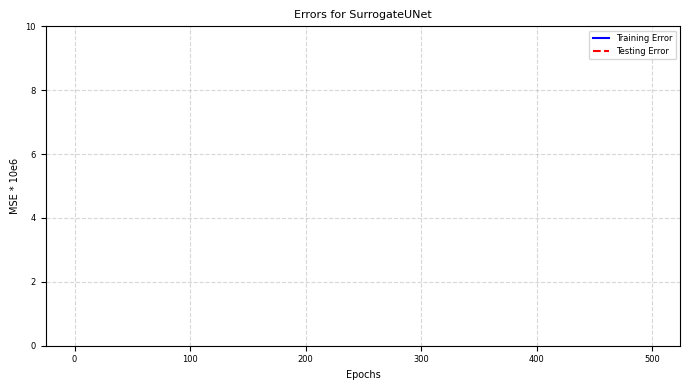

In [71]:
model_unet = SimulationModel(inputs_train, output_train,
    model = SurrogateUNet(),
    load_model_parameters=False)

model_unet.scheduler = torch.optim.lr_scheduler.LinearLR(
            model_unet.optimizer, 
            start_factor=0.05,  
            end_factor=0.0001,  
            total_iters=200)

model_unet.train(num_epochs=500, print_every=1, save_model=True)

model_unet.plot_errors()

In [70]:
model_unet.model.forward

<bound method SurrogateUNet.forward of SurrogateUNet(
  (encode1): DoubleConv(
    (network): Sequential(
      (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encode2): DoubleConv(
    (network): Sequential(
      (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encode3): DoubleConv(
    (network): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1,

. Perceptual Loss:

If the small change is aimed at improving the perceptual quality of the image (e.g., sharpening or enhancing details), you might want to consider using perceptual loss. Rather than focusing purely on pixel-wise loss, perceptual loss compares the features learned by a pre-trained neural network (like VGG) to assess how similar the generated image is to the target image in terms of high-level content.

    Content loss using a pretrained VGG network can be helpful in tasks like denoising or enhancing details without altering the underlying structure too much.mk

6. Attention Mechanisms:

Attention mechanisms might be helpful if the small change you're trying to introduce is spatially dependent on certain parts of the image. By focusing on key regions, attention layers can help the model modify the image in a more controlled manner.

    Self-attention layers (like in Vision Transformers) can allow the model to focus on different regions of the image based on their importance in the task.